<a href="https://colab.research.google.com/github/chaeeun0405/ML_Class/blob/main/9%EC%A3%BC%EC%B0%A8/ML_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. 데이터 로드 및 전처리

df = pd.read_csv('/content/drive/MyDrive/dataset/WISDM.csv', header=None, names=['user', 'activity', 'timestamp', 'x', 'y', 'z'])

In [12]:
df = df.dropna()
df = df.drop(['timestamp'], axis=1)
df = df.drop(['user'], axis=1)

In [56]:
df

,activity,x,y,z,Class
0,Jogging,-0.221614,0.792210,0.015937,1
1,Jogging,0.625987,0.580504,0.109693,1
2,Jogging,0.609804,0.523506,-0.106230,1
3,Jogging,-0.209476,1.661425,0.541539,1
4,Jogging,-0.294439,0.706713,1.413753,1
...,...,...,...,...,...
1048571,Standing,-1.296220,-0.291422,-0.295689,1
1048572,Standing,-1.302161,-0.336259,-0.326977,1
1048573,Standing,-1.302161,-0.322808,-0.377039,1
1048574,Standing,-1.296220,-0.266015,-0.335321,1


In [14]:
df.shape

(1048575, 4)

In [15]:
df.isnull().values.any()

np.False_

In [22]:
LABELS = ["Walking", "Other"]

In [24]:
# Walking은 정상(0), 나머지는 이상(1)
df['Class'] = df['activity'].apply(lambda x: 0 if x == 'Walking' else 1)

/tmp/ipython-input-3142487346.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


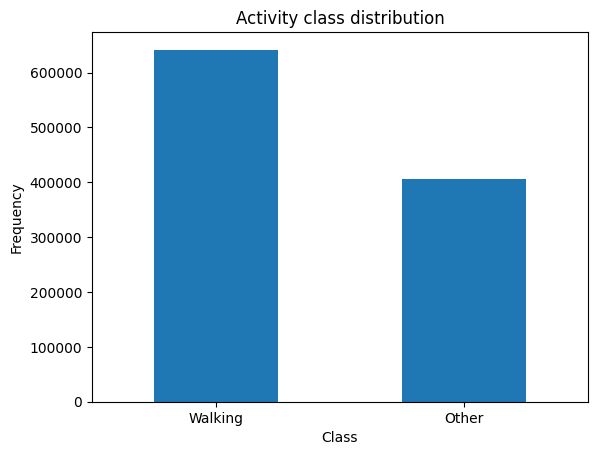

In [25]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind='bar', rot=0)
plt.title("Activity class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [29]:
Walking = df[df.Class == 1]
Other = df[df.Class == 0]
Walking.shape

(641800, 5)

In [30]:
Other.shape

(406775, 5)

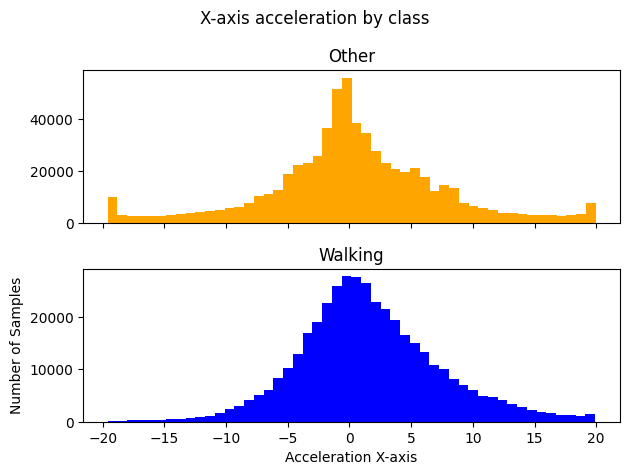

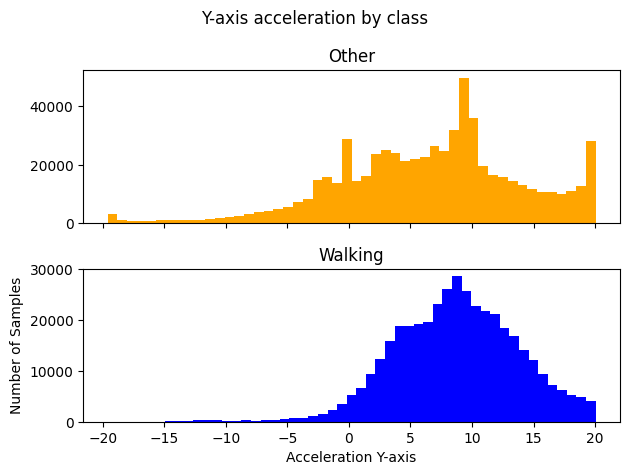

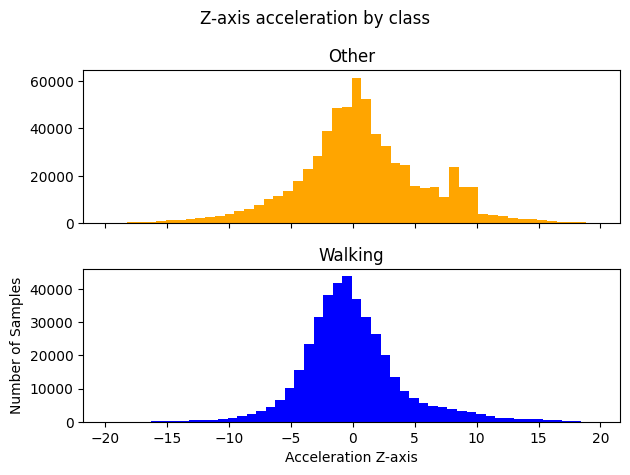

In [34]:
import matplotlib.pyplot as plt

# Walking(정상) / Other(이상) 분리
walking = df[df['activity'] == 'Walking']
other   = df[df['activity'] != 'Walking']

bins = 50

for axis in ['x', 'y', 'z']:
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    f.suptitle(f'{axis.upper()}-axis acceleration by class')

    # 이상(Other)
    ax1.hist(other[axis], bins=bins, color='orange')
    ax1.set_title('Other')

    # 정상(Walking)
    ax2.hist(walking[axis], bins=bins, color='blue')
    ax2.set_title('Walking')

    plt.xlabel(f'Acceleration {axis.upper()}-axis')
    plt.ylabel('Number of Samples')
    plt.tight_layout()
    plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# x, y, z 세 축 모두 정규화
df[['x', 'y', 'z']] = scaler.fit_transform(df[['x', 'y', 'z']])

In [38]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [46]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class', 'activity'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class', 'activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(325604, 3)

In [47]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [48]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5624 - val_loss: 0.3359
Epoch 2/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3370 - val_loss: 0.3343
Epoch 3/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3375 - val_loss: 0.3335
Epoch 4/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3366 - val_loss: 0.3329
Epoch 5/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3363 - val_loss: 0.3324
Epoch 6/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3379 - val_loss: 0.3322
Epoch 7/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3360 - val_loss: 0.3321
Epoch 8/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3352 - val_loss: 0.3321
Epoch 9/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3346 - val_loss: 0.3320
Epoch 10/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3333 - val_loss: 0.3319
Epoch 11/50
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3341 - val_loss: 0.3319
Epoch 12/50
1145/1145 ━━━━━━━━

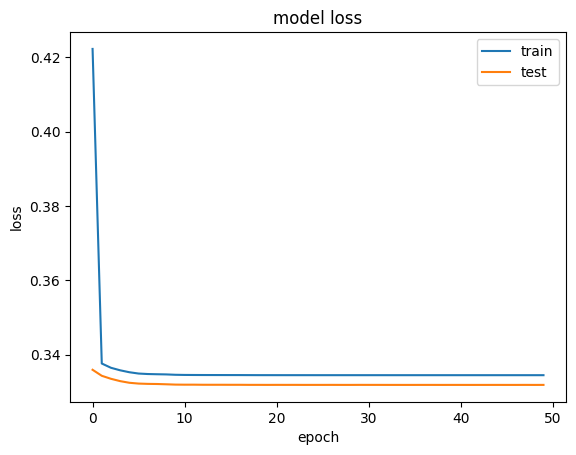

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [50]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6554/6554 ━━━━━━━━━━━━━━━━━━━━ 5s 807us/step


,reconstruction_error,true_class
count,2.097150e+05,209715.000000
mean,5.961100e-01,0.612946
std,1.006854e+00,0.487077
min,1.194158e-07,0.000000
25%,5.232048e-02,0.000000
50%,2.339747e-01,1.000000
75%,6.689980e-01,1.000000
max,1.258510e+01,1.000000


In [51]:
error_df.head()

,reconstruction_error,true_class
781975,0.018116,1
937738,0.096580,1
907829,0.011552,1
784629,0.879818,1
662461,0.479487,1


In [63]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 2.5

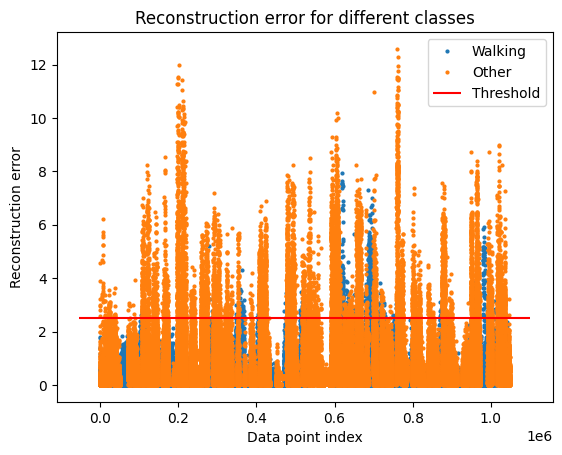

In [64]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=2, linestyle='',
            label= "Other" if name == 1 else "Walking")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

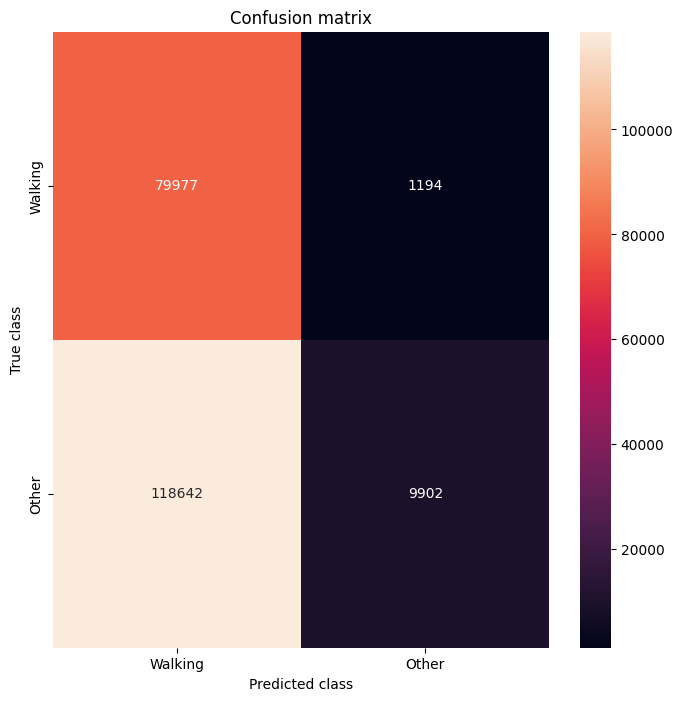

              precision    recall  f1-score   support

           0       0.40      0.99      0.57     81171
           1       0.89      0.08      0.14    128544

    accuracy                           0.43    209715
   macro avg       0.65      0.53      0.36    209715
weighted avg       0.70      0.43      0.31    209715



In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))